# Cronbach's alpha

In [5]:
import pandas as pd
import numpy as np

# Provided data
data = {
    "Motivations - Career": [
    3.6, 1, 3.8, 7, 4, 3, 1.6, 1.2, 3.8, 1, 5.2, 5.2, 1, 1, 5.2, 7, 
    3, 2, 1.4, 2, 2, 1, 3, 5.4, 6.4, 5.6, 1, 1, 1, 5.2, 1, 4.4, 
    1.4, 5, 1, 2, 1, 3.4, 1.8, 2.8, 3, 4.2, 1, 1, 1, 2.2, 2, 1, 
    5.6, 2.2],
    "Motivations - Social": [
    4.6, 1.6, 5.2, 6.8, 4.8, 3.6, 7, 4.4, 3.4, 1.4, 2.2, 2.6, 2.8, 
    2.8, 5, 6.4, 3.4, 4.6, 2, 2.8, 6, 1.8, 3.6, 5.2, 4.2, 2.6, 
    1.2, 3.8, 4.6, 2.4, 2.8, 4, 4.4, 2.2, 1.6, 4.2, 3, 4, 6.2, 
    2.6, 4.8, 3.4, 1.8, 5, 2.8, 1.4, 1.4, 3.8, 6, 1],
    "Motivations - Values": [
    6.6, 7, 6.8, 7, 6.4, 5.4, 7, 6, 6.4, 5.8, 6.6, 5.2, 6.4, 6, 7, 
    7, 4.4, 4.8, 6, 5.8, 7, 6.6, 5.8, 6, 6, 5.8, 3.6, 7, 6.2, 6, 
    6.4, 6.4, 5.8, 5.4, 5.2, 6, 5.6, 6.4, 6.8, 5.2, 5.8, 6.6, 4.4, 
    5.4, 6, 6.6, 4.4, 7, 6.4, 5.8],
    "Motivations - Understd": [
    5.8, 5, 5.8, 7, 6.8, 5.4, 6, 5.8, 6.6, 3.2, 6.8, 5.4, 4.2, 5.6, 
    6.6, 7, 4.2, 4.2, 3.6, 4.4, 6, 2.6, 6, 7, 7, 6, 5.4, 5.4, 5, 
    5.8, 4, 5.4, 3.4, 5.2, 2.8, 6.8, 3.8, 6, 5.4, 3.4, 4.4, 6, 
    2.6, 6, 3.2, 4.6, 3.4, 5.8, 5.8, 5.6],
    "Motivations - Enhance": [
    2.8, 2.6, 4, 7, 4.2, 3.8, 3.2, 4.2, 4.2, 1.8, 6.6, 2.8, 4.2, 4.6, 
    6.4, 6.6, 4.2, 6.4, 2, 2.8, 7, 1.8, 5.4, 7, 7, 5.6, 2.4, 4.2, 
    3.4, 5.8, 3, 4.6, 5, 4.8, 1.8, 4.2, 1.6, 4.6, 5, 2.6, 4.6, 5, 
    3, 5.2, 3, 3.6, 4.6, 3.6, 6.8, 5],
    "Motivations - Protect": [
    4, 3.25, 5.25, 7, 5, 3.5, 3.25, 2.25, 5.25, 2, 5, 4, 2.75, 4.5, 
    3.25, 4.5, 4.25, 4.5, 2.25, 2, 5.75, 5.5, 6.5, 7, 7, 4.5, 1.25, 
    4.25, 5, 4, 3.25, 4.5, 3.5, 5, 1.25, 5.75, 2.5, 6.5, 5, 4.25, 
    4.25, 4, 2, 5.5, 4, 3, 3.5, 2.75, 6, 1.75],
    "Engagement - Vigor": [
    5, 4, 3.666666667, 6, 4.666666667, 3, 4, 3.333333333, 4.666666667, 3, 4, 4, 
    5.666666667, 4.333333333, 4, 6, 3, 4.666666667, 2.666666667, 3, 4.666666667, 
    3.666666667, 5, 5.666666667, 6, 2.666666667, 3, 6, 4.666666667, 5.666666667, 
    3.666666667, 4.666666667, 2.666666667, 4.333333333, 4.333333333, 3.666666667, 
    1, 3.666666667, 5.333333333, 2.666666667, 4, 5, 0.333333333, 5, 3.666666667, 
    2.666666667, 3, 6, 4, 5.333333333],
    "Engagement - Dedication": [
    5.666666667, 5, 5, 6, 6, 4.666666667, 6, 4.666666667, 5.666666667, 4.666666667, 
    5.333333333, 4, 6, 6, 5.333333333, 6, 4, 4.333333333, 3.666666667, 4.333333333, 
    6, 5.333333333, 5.333333333, 6, 6, 5, 4, 6, 6, 5, 5.333333333, 5, 3.333333333, 
    5, 5, 4, 2.666666667, 4.333333333, 6, 3, 4.333333333, 6, 3.666666667, 
    4.666666667, 5, 5.333333333, 4.666666667, 6, 5.333333333, 6],
    "Engagement - Absorption": [
    5.666666667, 5.666666667, 5.333333333, 6, 4.333333333, 2.666666667, 4.333333333, 
    2, 5.333333333, 3.666666667, 4.666666667, 4, 5, 4.666666667, 5, 5, 3.666666667, 
    3.666666667, 3, 3.666666667, 5, 3.666666667, 4.333333333, 5.666666667, 
    5.666666667, 3.666666667, 3, 5.333333333, 5.333333333, 5, 3.666666667, 5, 
    4, 4.666666667, 3.666666667, 4.333333333, 1.666666667, 4.333333333, 6, 
    1.666666667, 3, 6, 1, 4, 3.333333333, 2.333333333, 2, 5.333333333, 
    5.666666667, 3.666666667],
    "Satisfaction - Task": [
    6, 6, 6.25, 7, 7, 5.75, 6.25, 6, 5.5, 6.25, 6, 5.5, 1.25, 5.75, 7, 
    7, 5.25, 6.25, 5.75, 5.5, 6, 6.25, 5, 7, 7, 5, 7, 6, 5.25, 6.5, 7, 
    6.5, 6, 5.25, 6.5, 5.75, 4.5, 6, 7, 4.5, 4.5, 6.75, 5.5, 6, 6.25, 
    5, 7, 5.75, 6.5, 7],
    "Satisfaction - Organisation": [
    6.857142857, 5.285714286, 6.285714286, 7, 5.571428571, 6.142857143, 
    3.714285714, 3.571428571, 5.857142857, 6.857142857, 6.142857143, 
    4.571428571, 1.571428571, 6.857142857, 5.714285714, 7, 5.714285714, 
    5.142857143, 5.285714286, 3.714285714, 5.857142857, 5.714285714, 
    6, 7, 7, 3.142857143, 6, 4.571428571, 4.857142857, 5.571428571, 
    6.857142857, 6.857142857, 4.142857143, 5, 2.571428571, 3.714285714, 
    5.714285714, 5.857142857, 7, 5.142857143, 4.428571429, 6.285714286, 
    4, 5, 5.428571429, 4.857142857, 6.714285714, 3.571428571, 6.714285714, 
    6.428571429],
    "Commitment": [
    4.5, 2.25, 4, 3.75, 4.25, 4, 3.75, 4.25, 3.75, 4.25, 4, 4.5, 4.5, 
    2.75, 4.5, 4.25, 3.5, 3.25, 2.5, 3, 4.75, 2.75, 2.25, 2.25, 3, 
    4.25, 3.25, 3, 4.5, 4.75, 4.25, 4.25, 2.75, 4.5, 4.5, 4.75, 
    2.5, 4, 2.5, 4.75, 2.25, 4.75, 3, 3.25, 4.25, 2.25, 4, 4, 
    2.5, 4]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Compute variances for each item (column)
variances = df.var()

# Step 3: Compute covariances between items
cov_matrix = df.cov()

# Step 4: Calculate average variance
average_variance = variances.mean()

# Step 5: Calculate average covariance (off-diagonal values of covariance matrix)
n_items = df.shape[1]
total_covariance = cov_matrix.values.sum() - np.trace(cov_matrix.values)  # Sum all off-diagonal elements
average_covariance = total_covariance / (n_items * (n_items - 1))  # Average of off-diagonal elements

# Step 6: Calculate Cronbach's alpha
n_items = len(df.columns)
cronbach_alpha = (n_items * average_covariance) / (average_variance + (n_items - 1) * average_covariance)

cronbach_alpha

0.8721568949299142

# ANOVA

## 1. Age

In [7]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("Age")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 4.5469350756176805
P-Value: 0.001986912888959459
There is a statistically significant difference between groups.


In [10]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.9035003850451246
P-Value: 0.4874287815657874
No statistically significant difference between groups.


In [11]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.128585934475799
P-Value: 0.9851053841739478
No statistically significant difference between groups.


In [12]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.6099805615969176
P-Value: 0.03756553260796811
There is a statistically significant difference between groups.


In [13]:
#5

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Motivations - Enhance"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.670745954265022
P-Value: 0.007313095597516281
There is a statistically significant difference between groups.


In [14]:
#6

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Motivations - Protect"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.404727472565987
P-Value: 0.010968023901823477
There is a statistically significant difference between groups.


In [15]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.4844112073981812
P-Value: 0.21429393377518646
No statistically significant difference between groups.


In [16]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.4686058259752726
P-Value: 0.21941576642972832
No statistically significant difference between groups.


In [17]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.2022399043337944
P-Value: 0.323916445158078
No statistically significant difference between groups.


In [18]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.5314877328775832
P-Value: 0.7512086626630957
No statistically significant difference between groups.


In [19]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.9425195017541832
P-Value: 0.10643975226701821
No statistically significant difference between groups.


In [20]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Age")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.7612866603595076
P-Value: 0.006376865783799326
There is a statistically significant difference between groups.


## 2. Gender Identity

In [23]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.843249145101017
P-Value: 0.16956291578820495
No statistically significant difference between groups.


In [24]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.4581480371314868
P-Value: 0.03970804430758977
There is a statistically significant difference between groups.


In [25]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.25848937132519245
P-Value: 0.7733078331821023
No statistically significant difference between groups.


In [26]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.5731382496858817
P-Value: 0.2181174558988344
No statistically significant difference between groups.


In [27]:
#5

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Enhance"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.753086953197132
P-Value: 0.07402116294099305
No statistically significant difference between groups.


In [28]:
#6

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Motivations - Protect"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.8643539440312467
P-Value: 0.166278213170716
No statistically significant difference between groups.


In [29]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.738381367599298
P-Value: 0.48334788775213355
No statistically significant difference between groups.


In [30]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.80368775340155
P-Value: 0.45373116159477755
No statistically significant difference between groups.


In [31]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.7422332399703315
P-Value: 0.4815463190468694
No statistically significant difference between groups.


In [32]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.1632262583722124
P-Value: 0.1262642258111957
No statistically significant difference between groups.


In [33]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.1735314074646155
P-Value: 0.31816977443338684
No statistically significant difference between groups.


In [34]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your gender identity? \n(Please select one of the options below or describe your gender identity.)")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.6025463878685122
P-Value: 0.21219100677119643
No statistically significant difference between groups.


## 3. Ethnic Background

In [36]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 5.173344302558738
P-Value: 0.001625022688211805
There is a statistically significant difference between groups.


In [37]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.0497088145830857
P-Value: 0.10340959031231656
No statistically significant difference between groups.


In [38]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.31268561810360956
P-Value: 0.8680020489887591
No statistically significant difference between groups.


In [39]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.925310412499529
P-Value: 0.008111796613584542
There is a statistically significant difference between groups.


In [40]:
#5

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Enhance"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 4.562569993196921
P-Value: 0.0035316996300269405
There is a statistically significant difference between groups.


In [41]:
#6

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Motivations - Protect"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.6375765919491196
P-Value: 0.04612293106177416
There is a statistically significant difference between groups.


In [42]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.09344472996097
P-Value: 0.09738720139581482
No statistically significant difference between groups.


In [43]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.694131594473146
P-Value: 0.042682537892609944
There is a statistically significant difference between groups.


In [44]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.538781676003434
P-Value: 0.2071708654662448
No statistically significant difference between groups.


In [45]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.137567613977849
P-Value: 0.09166346121489172
No statistically significant difference between groups.


In [46]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.1324297408864163
P-Value: 0.0923124165635675
No statistically significant difference between groups.


In [47]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("How do you identify your ethnic background?\n(Please select the option that best describes you.) ")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.4263281471004243
P-Value: 0.24074636164820193
No statistically significant difference between groups.


## 4. Disability Status

In [49]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("Do you identify as having a disability? ")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.29326246676347223
P-Value: 0.7471810896102404
No statistically significant difference between groups.


In [50]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.4395352555902369
P-Value: 0.6469570636757545
No statistically significant difference between groups.


In [51]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.2067217630854
P-Value: 0.3082757334437812
No statistically significant difference between groups.


In [52]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.8941183755643858
P-Value: 0.41580937792316985
No statistically significant difference between groups.


In [53]:
#5

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Motivations - Enhance"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.3239464235223422
P-Value: 0.2758229314404366
No statistically significant difference between groups.


In [54]:
#6

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Motivations - Protect"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.6245848787190287
P-Value: 0.08306802893501071
No statistically significant difference between groups.


In [55]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.8601932176967713
P-Value: 0.42963300760444445
No statistically significant difference between groups.


In [56]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.3077423548865514
P-Value: 0.7365745929583427
No statistically significant difference between groups.


In [57]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.7608486890847059
P-Value: 0.47293778913195716
No statistically significant difference between groups.


In [58]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.6704420227745808
P-Value: 0.5163055980017369
No statistically significant difference between groups.


In [59]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.0325211866187638
P-Value: 0.3640436606435315
No statistically significant difference between groups.


In [60]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("Do you identify as having a disability? ")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.9965686469070665
P-Value: 0.14715463759447273
No statistically significant difference between groups.


## 5. Education Level

In [62]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.6228436441276974
P-Value: 0.036818374665591375
There is a statistically significant difference between groups.


In [63]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.6922386933737177
P-Value: 0.1564850068694703
No statistically significant difference between groups.


In [64]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.20605155450990723
P-Value: 0.9582137833416118
No statistically significant difference between groups.


In [65]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 2.0329652069495388
P-Value: 0.09249465820323804
No statistically significant difference between groups.


In [66]:
#5

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Enhance"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 6.412435809969861
P-Value: 0.00014846977519976438
There is a statistically significant difference between groups.


In [67]:
#6

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Motivations - Protect"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.5631284782478607
P-Value: 0.008611872135272721
There is a statistically significant difference between groups.


In [68]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.0514449452891559
P-Value: 0.40002471870409245
No statistically significant difference between groups.


In [69]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.5435792285035768
P-Value: 0.7422061423812247
No statistically significant difference between groups.


In [70]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.848243137430178
P-Value: 0.5232024023537936
No statistically significant difference between groups.


In [71]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.0869367868015505
P-Value: 0.3809352964479943
No statistically significant difference between groups.


In [72]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.0826664600871925
P-Value: 0.38319342478146134
No statistically significant difference between groups.


In [73]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is the highest level of education you have completed?\n(Please select the option that best describes your educational attainment.) ")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.326530263819027
P-Value: 0.2706828460366153
No statistically significant difference between groups.


## 6. Employment Status

In [75]:
#1
import pandas as pd
from scipy.stats import f_oneway

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Example: Perform ANOVA for "Motivations - Career" across "Age"
# Ensure the column names match exactly in your dataset
groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Motivations - Career"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 4.051336613108195
P-Value: 0.0017867449872141982
There is a statistically significant difference between groups.


In [76]:
#2

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Motivations - Social"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 3.0805187483049226
P-Value: 0.010343173841568977
There is a statistically significant difference between groups.


In [77]:
#3

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Motivations - Values"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.912728469465414
P-Value: 0.09153323484561285
No statistically significant difference between groups.


In [78]:
#4

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Motivations - Understd"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.9009162105263153
P-Value: 0.09355569990366565
No statistically significant difference between groups.


In [79]:
#7

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Engagement - Vigor"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 1.0939736561024611
P-Value: 0.3845246189107069
No statistically significant difference between groups.


In [80]:
#8

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Engagement - Dedication"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.9102211032570479
P-Value: 0.5080122985420146
No statistically significant difference between groups.


In [81]:
#9

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Engagement - Absorption"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.6874480703239166
P-Value: 0.6819165301958185
No statistically significant difference between groups.


In [82]:
#10

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Satisfaction - Task"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.6787517209729232
P-Value: 0.6889536475897975
No statistically significant difference between groups.


In [83]:
#11

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Satisfaction - Organisation"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.5690419774429386
P-Value: 0.7767145615559377
No statistically significant difference between groups.


In [84]:
#12

# Load your CSV file
file_path = "Volunteer Engagement in Sustainable Merton - Summary.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

groups = data.groupby("What is your current employment status?\n(Please select the option that best describes your current employment status.) ")["Commitment"]

# Extract the scores for each age group
anova_data = [group.dropna().values for _, group in groups]  # Drop NaN values if any

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*anova_data)

# Output the results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

F-Statistic: 0.672851604256745
P-Value: 0.6937276805744885
No statistically significant difference between groups.


# Chi Square Test to Analyze Relationship between Project Involvement and Motivation

In [85]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data (adjust file path and column names as needed)
# Re-loading the data after code execution state reset
file_path = 'Volunteer Engagement in Sustainable Merton - Project Involvement vs Motivation.xlsx'
sheet_name = 'Project Involvement'

# Read the data from the sheet
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Step 1: Categorize motivation scores into bins (e.g., Low, Medium, High)
# Example: Categorizing "Motivations - Career" into 3 bins
data['Motivations_Career_Binned'] = pd.cut(data['Motivations - Career'], bins=3, labels=["Low", "Medium", "High"])

# Repeat for other motivation columns as needed
motivation_columns = ['Motivations - Career', 'Motivations - Social', 'Motivations - Values', 
                      'Motivations - Understd', 'Motivations - Enhance', 'Motivations - Protect']

for col in motivation_columns:
    data[f'{col}_Binned'] = pd.cut(data[col], bins=3, labels=["Low", "Medium", "High"])

# Step 2: Perform chi-square test for each motivation variable against "Project Involvement"
for col in motivation_columns:
    contingency_table = pd.crosstab(data['Project Involvement'], data[f'{col}_Binned'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {col}")
    print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print("-----\n")

    # Interpretation
    if p < 0.05:
        print(f"There is a significant relationship between Project Involvement and {col}.\n")
    else:
        print(f"No significant relationship between Project Involvement and {col}.\n")

Chi-Square Test for Motivations - Career
Chi-Square Statistic: 12.712053571428573, P-Value: 0.24021975918811614
Degrees of Freedom: 10
Expected Frequencies:
[[8.96 2.24 2.8 ]
 [4.48 1.12 1.4 ]
 [8.96 2.24 2.8 ]
 [7.68 1.92 2.4 ]
 [1.28 0.32 0.4 ]
 [0.64 0.16 0.2 ]]
-----

No significant relationship between Project Involvement and Motivations - Career.

Chi-Square Test for Motivations - Social
Chi-Square Statistic: 14.871482683982682, P-Value: 0.13681809114689505
Degrees of Freedom: 10
Expected Frequencies:
[[6.16 5.6  2.24]
 [3.08 2.8  1.12]
 [6.16 5.6  2.24]
 [5.28 4.8  1.92]
 [0.88 0.8  0.32]
 [0.44 0.4  0.16]]
-----

No significant relationship between Project Involvement and Motivations - Social.

Chi-Square Test for Motivations - Values
Chi-Square Statistic: 11.659306195596518, P-Value: 0.30850469973913525
Degrees of Freedom: 10
Expected Frequencies:
[[1.12 4.2  8.68]
 [0.56 2.1  4.34]
 [1.12 4.2  8.68]
 [0.96 3.6  7.44]
 [0.16 0.6  1.24]
 [0.08 0.3  0.62]]
-----

No significant 

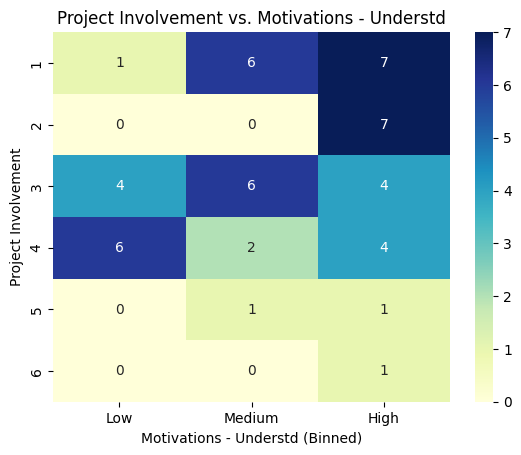

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for one motivation variable
contingency_table = pd.crosstab(data['Project Involvement'], data['Motivations - Understd_Binned'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Project Involvement vs. Motivations - Understd")
plt.xlabel("Motivations - Understd (Binned)")
plt.ylabel("Project Involvement")
plt.show()

# Chi Square Test to Analyze Relationship between Hours and Engagement&Satisfaction

In [92]:
# Load the dataset (adjust file path and sheet name as needed)
file_path = "Volunteer Engagement in Sustainable Merton - Project Involvement vs Motivation.xlsx"  # Replace with your actual file path
sheet_name = "Hours"         # Replace with the correct sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Variables for analysis
independent_var = "Hours"
dependent_vars = ["Engagement - Vigor", "Engagement - Dedication", "Engagement - Absorption", 
                  "Satisfaction - Task", "Satisfaction - Organisation"]

# Step 1: Categorize engagement and satisfaction scores into bins (Low, Medium, High)
for dep_var in dependent_vars:
    data[f'{dep_var}_Binned'] = pd.cut(data[dep_var], bins=3, labels=["Low", "Medium", "High"])

# Step 2: Perform chi-square test for each dependent variable against Hours
for dep_var in dependent_vars:
    contingency_table = pd.crosstab(data[independent_var], data[f'{dep_var}_Binned'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Chi-Square Test for {independent_var} vs {dep_var}")
    print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print("-----\n")

    # Interpretation
    if p < 0.05:
        print(f"There is a significant relationship between {independent_var} and {dep_var}.\n")
    else:
        print(f"No significant relationship between {independent_var} and {dep_var}.\n")

Chi-Square Test for Hours vs Engagement - Vigor
Chi-Square Statistic: 6.733141877601906, P-Value: 0.565679255670171
Degrees of Freedom: 8
Expected Frequencies:
[[ 0.36  4.5   4.14]
 [ 1.24 15.5  14.26]
 [ 0.28  3.5   3.22]
 [ 0.08  1.    0.92]
 [ 0.04  0.5   0.46]]
-----

No significant relationship between Hours and Engagement - Vigor.

Chi-Square Test for Hours vs Engagement - Dedication
Chi-Square Statistic: 13.430127220449803, P-Value: 0.09788236620084259
Degrees of Freedom: 8
Expected Frequencies:
[[ 0.9   2.34  5.76]
 [ 3.1   8.06 19.84]
 [ 0.7   1.82  4.48]
 [ 0.2   0.52  1.28]
 [ 0.1   0.26  0.64]]
-----

No significant relationship between Hours and Engagement - Dedication.

Chi-Square Test for Hours vs Engagement - Absorption
Chi-Square Statistic: 10.063771354093936, P-Value: 0.26057851101084806
Degrees of Freedom: 8
Expected Frequencies:
[[ 1.08  3.96  3.96]
 [ 3.72 13.64 13.64]
 [ 0.84  3.08  3.08]
 [ 0.24  0.88  0.88]
 [ 0.12  0.44  0.44]]
-----

No significant relationshi

# Sustainability Correlations

In [93]:
from scipy.stats import pearsonr

# Load your dataset
file_path = "Sustainability.xlsx"  # Replace with your actual file path
sheet_name = "Sustainability"  # Replace with the sheet name where the data is
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define the variables
sustainability = "Sustainability"  # Replace with the actual column name
other_columns = [
    "Motivations - Career", "Motivations - Social", "Motivations - Values",
    "Motivations - Understd", "Motivations - Enhance", "Motivations - Protect",
    "Engagement - Vigor", "Engagement - Dedication", "Engagement - Absorption",
    "Satisfaction - Task", "Satisfaction - Organisation", "Commitment"
]

# Calculate correlations
correlation_results = []
for column in other_columns:
    corr, p_value = pearsonr(data[sustainability], data[column])
    correlation_results.append({"Variable": column, "Correlation": corr, "P-Value": p_value})

# Convert results to DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Add significance flag
correlation_df["Significant"] = correlation_df["P-Value"] < 0.05

# Display the results
print("Correlation Results:")
print(correlation_df)

Correlation Results:
                       Variable  Correlation   P-Value  Significant
0          Motivations - Career     0.445791  0.001177         True
1          Motivations - Social     0.495212  0.000256         True
2          Motivations - Values     0.497574  0.000237         True
3        Motivations - Understd     0.582872  0.000009         True
4         Motivations - Enhance     0.375665  0.007179         True
5         Motivations - Protect     0.388313  0.005326         True
6            Engagement - Vigor     0.601434  0.000004         True
7       Engagement - Dedication     0.478302  0.000443         True
8       Engagement - Absorption     0.590445  0.000006         True
9           Satisfaction - Task     0.194682  0.175482        False
10  Satisfaction - Organisation     0.245789  0.085335        False
11                   Commitment     0.386137  0.005612         True


# Analyse new volunteers

In [95]:
from scipy.stats import ttest_ind

# Load the dataset
file_path = "New Volunteers.xlsx"  # Replace with your actual file path
sheet_name = "New Volunteers"  # Replace with the sheet name where the data is
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Separate groups
new_volunteers = df[df['New / Old'] == 'New']
old_volunteers = df[df['New / Old'] == 'Old']

# List of columns to test
columns_to_test = ['Motivations - Career', 'Motivations - Social', 'Motivations - Values', 
                   'Motivations - Understd', 'Motivations - Enhance', 'Motivations - Protect', 
                   'Engagement - Vigor', 'Engagement - Dedication', 'Engagement - Absorption', 
                   'Satisfaction - Task', 'Satisfaction - Organisation', 'Commitment']

# Perform t-tests
results = []
for column in columns_to_test:
    t_stat, p_value = ttest_ind(new_volunteers[column], old_volunteers[column], nan_policy='omit')
    results.append({'Variable': column, 't-stat': t_stat, 'p-value': p_value, 
                    'Significant': p_value < 0.05})

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                       Variable    t-stat   p-value  Significant
0          Motivations - Career  1.724020  0.091009        False
1          Motivations - Social  1.427769  0.159701        False
2          Motivations - Values  1.434072  0.157903        False
3        Motivations - Understd  3.057448  0.003610         True
4         Motivations - Enhance  1.697296  0.095985        False
5         Motivations - Protect  1.383213  0.172870        False
6            Engagement - Vigor  1.891887  0.064423        False
7       Engagement - Dedication  2.479112  0.016660         True
8       Engagement - Absorption  2.058087  0.044921         True
9           Satisfaction - Task  1.329645  0.189792        False
10  Satisfaction - Organisation  2.300356  0.025726         True
11                   Commitment -3.853685  0.000339         True


# Analyse open-ended questions

Top Keywords: ['community' 'difference' 'doing' 'enjoy' 'environment' 'feel' 'food'
 'fortunate' 'giving' 'good' 'help' 'helping' 'impact' 'interesting'
 'involved' 'like' 'local' 'make' 'need' 'people']


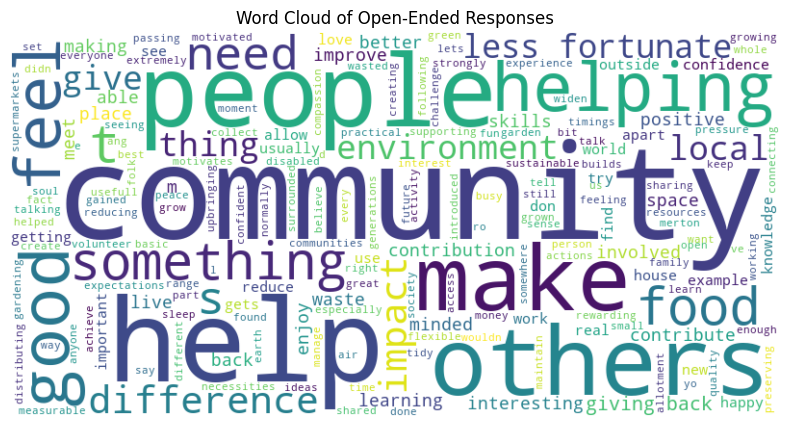

sentiment
Positive    32
Neutral     15
Negative     3
Name: count, dtype: int64
theme
altruism    31
other       19
Name: count, dtype: int64


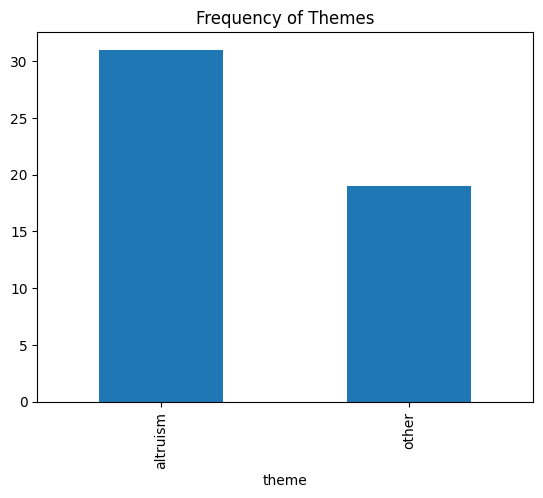

In [100]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("Open_Ended.csv")

# Clean the text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', '', text)  # Remove numbers
    return text.lower()

df['cleaned_text'] = df['In your own words, what motivates you to volunteer? '].apply(clean_text)

# Keyword extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])
tfidf_features = vectorizer.get_feature_names_out()

# Display top keywords
print("Top Keywords:", tfidf_features)

# Generate a Word Cloud
text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Open-Ended Responses")
plt.show()

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
print(df['sentiment'].value_counts())

# Thematic analysis example (manual coding)
# Create a mapping of keywords to themes (altruism, career, etc.)
themes = {
    "altruism": ["help", "community", "support"],
    "career": ["career", "growth", "job"],
    "social": ["friend", "connect", "interaction"]
}

def map_themes(text):
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return "other"

df['theme'] = df['cleaned_text'].apply(map_themes)
print(df['theme'].value_counts())

# Visualize theme frequencies
df['theme'].value_counts().plot(kind='bar', title="Frequency of Themes")
plt.show()

Top Keywords: ['better' 'community' 'don' 'good' 'growing' 'happy' 'helps' 'home'
 'hours' 'interaction' 'opportunities' 'organisation' 'projects' 'regular'
 'social' 'spaces' 'time' 'volunteer' 'volunteering' 'work']


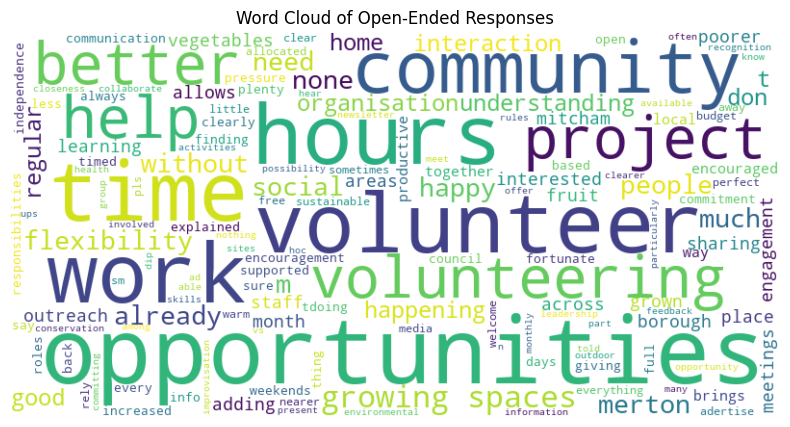

sentiment
Positive    27
Neutral     21
Negative     2
Name: count, dtype: int64
theme
other       42
altruism     6
social       2
Name: count, dtype: int64


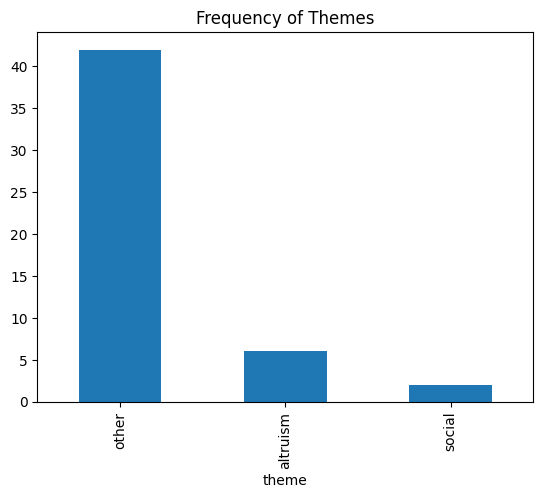

In [102]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("Open_Ended.csv")

# Clean the text
def clean_text(text):
    if pd.isnull(text):  # Check for null values
        return ""  # Return an empty string for null values
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', '', text)  # Remove numbers
    return text.lower()

df['cleaned_text'] = df['What other factors could further facilitate your volunteering with Sustainable Merton? '].apply(clean_text)

# Keyword extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])
tfidf_features = vectorizer.get_feature_names_out()

# Display top keywords
print("Top Keywords:", tfidf_features)

# Generate a Word Cloud
text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Open-Ended Responses")
plt.show()

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
print(df['sentiment'].value_counts())

# Thematic analysis example (manual coding)
# Create a mapping of keywords to themes (altruism, career, etc.)
themes = {
    "altruism": ["help", "community", "support"],
    "career": ["career", "growth", "job"],
    "social": ["friend", "connect", "interaction"]
}

def map_themes(text):
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return "other"

df['theme'] = df['cleaned_text'].apply(map_themes)
print(df['theme'].value_counts())

# Visualize theme frequencies
df['theme'].value_counts().plot(kind='bar', title="Frequency of Themes")
plt.show()

Top Keywords: ['communication' 'community' 'don' 'fridge' 'group' 'groups' 'important'
 'info' 'information' 'know' 'like' 'members' 'merton' 'messages'
 'projects' 'separate' 'social' 'sure' 'sustainable' 'whatsapp']


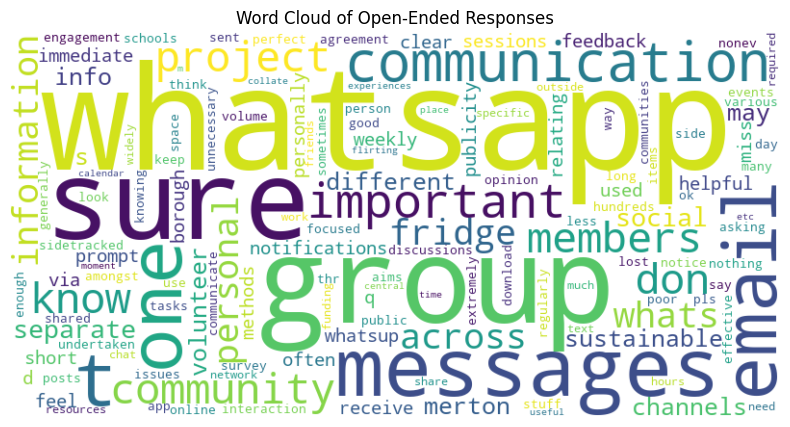

sentiment
Neutral     29
Positive    14
Negative     7
Name: count, dtype: int64
theme
other       45
altruism     4
social       1
Name: count, dtype: int64


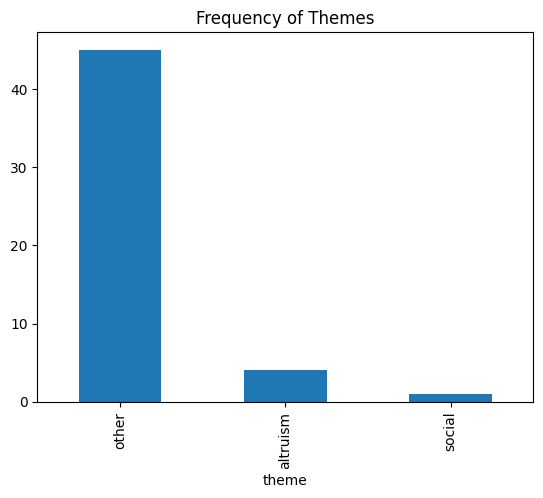

In [103]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("Open_Ended.csv")

# Clean the text
def clean_text(text):
    if pd.isnull(text):  # Check for null values
        return ""  # Return an empty string for null values
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', '', text)  # Remove numbers
    return text.lower()

df['cleaned_text'] = df['What additional features or improvements would you like to see in the communication methods? '].apply(clean_text)

# Keyword extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])
tfidf_features = vectorizer.get_feature_names_out()

# Display top keywords
print("Top Keywords:", tfidf_features)

# Generate a Word Cloud
text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Open-Ended Responses")
plt.show()

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
print(df['sentiment'].value_counts())

# Thematic analysis example (manual coding)
# Create a mapping of keywords to themes (altruism, career, etc.)
themes = {
    "altruism": ["help", "community", "support"],
    "career": ["career", "growth", "job"],
    "social": ["friend", "connect", "interaction"]
}

def map_themes(text):
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return "other"

df['theme'] = df['cleaned_text'].apply(map_themes)
print(df['theme'].value_counts())

# Visualize theme frequencies
df['theme'].value_counts().plot(kind='bar', title="Frequency of Themes")
plt.show()